# **Exploratory Data Analysis**
---

Statistical Analysis of tweets - Tweet analytics visualizations are straightforward yet insightful tools. Some of these techniques have been implemented to gauge the scope of the problem statement, which are as follows - Character Frequency Distribution, Phrase Length Statistics, and Mean Word Size Distribution. These techniques are useful for exploring the core properties of tweet data.

In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 7.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=96b686359ab297023b97fee90fd92df5a74e24b0952b8b6199e287de203f9537
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=76fe57a0ac033339985620b74d32e06efc9e6a6826a12b26cef582bb40b3f79c
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pyLDAvis sklearn


In [ ]:
#Necessary imports
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as mtplt
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from collections import  Counter
from sklearn.feature_extraction.text import CountVectorizer
import gensim
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from wordcloud import WordCloud, STOPWORDS
pyLDAvis.enable_notebook()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


**Cleaned Data Retrieval**

In [ ]:
tweetData = pd.read_csv('/content/drive/MyDrive/NNDL-Group-project/data/text_emotion_recognition_updated.csv', index_col=False)
tweetData

,tweet_id,tweet,tweettype
0,0,@ZubairSabirPTI pls dont insult the word 'Molna',anger
1,1,@ArcticFantasy I would have almost took offens...,anger
2,2,@IllinoisLoyalty that Rutgers game was an abom...,anger
3,3,@CozanGaming that's what lisa asked before she...,anger
4,4,Sometimes I get mad over something so minuscul...,anger
...,...,...,...
43955,43955,@JohnLloydTaylor,neutral
43956,43956,Happy Mothers Day All my love,love
43957,43957,Happy Mother's Day to all the mommies out ther...,love
43958,43958,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,happiness


> We begin the analysis by understanding the rough estimation of the tweet length, by finding out the number of characters present in each sentence of a tweet.

---

Character frequency distribution is implemented on the cleaned dataset. In this technique, the number of characters present in each phrase/sentence is obtained, which gives a rough estimation of tweet length, an important parameter in determining embedding dimensions for neural networks

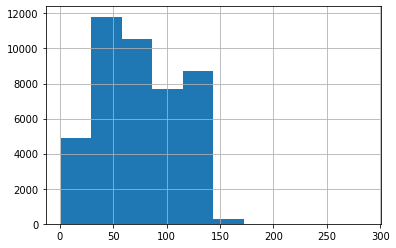

In [ ]:
tweetData['tweet'].str.len().hist()


The histogram plot above indicates that tweets range from 0 to 200 characters, mostly between 30 and 70 characters. The next step is to analyse the number of words used in each tweet in the dataset.

> To get a rough estimation of dimensions needed for the neural network architecture - by counting the number of words in each tweet

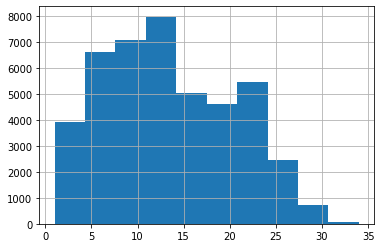

In [ ]:
tweetData['tweet'].str.split().map(lambda x: len(x)).hist()


> The plot above depicts that the number of words range between 2 to 35. This plot is consistent with the character frequency analysis as well, as both the plots put together also represent the character limit imposed by twitter for it’s users. This also implies that if the majority of the distribution lies within a small range of data, it may not be entirely useful to use these statistical properties as predictor variables for tweet sentiment analysis.

Now, we check the average word length in each sentence

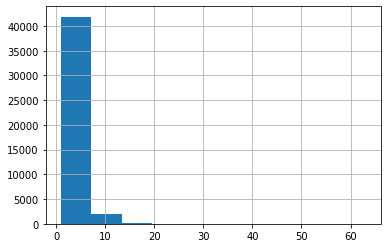

In [ ]:
tweetData['tweet'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()


> The plot obtained for the dataset implies that although the range of average word length spans from 1 to 54, the distribution is extremely skewed to the left, which indicates the use of smaller words in tweets. This adds to the point of most words being similar in terms of length, which would therefore not be a good parameter for the prediction model.

From the above analysis, one may assume that people are generally using really short words in tweets, and, although this conjecture may ne true in some cases, it is not a correct conclusion/explaination to explaing the plots obtained. One reason for this is the presence of stopwords, words that are most commonly used in any language (a, an, the, etc.). This can explain why the above plot could be left skewed by short words.

In [ ]:
stop=set(stopwords.words('english'))


The conclusion derived from the statistical analysis of tweets is not the best explanation for the skewed nature of the dataset. It cannot be assumed that all tweets are composed of smaller words. Therefore, another reason why (enter figure number) here is obtained is because of stopwords. Stop words are terms that are often filtered out before processing natural language. These are the most frequent words in any language (such as articles, prepositions, pronouns, conjunctions, and so on) that offer little information to the text. Analyzing the number and kind of stopwords might provide useful insights into the data. The nltk library was used to obtain the corpus containing stopwords.

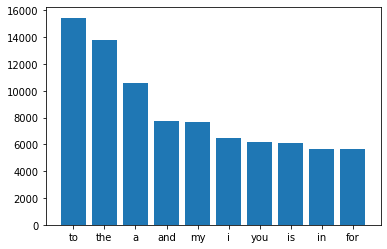

In [ ]:
# Plot the occurances of the most common stopwords in the dataset - create the corpus
corpus=[]
check= tweetData['tweet'].str.split()
check=check.values.tolist()
corpus=[word for i in check for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
mtplt.bar(x,y)
mtplt.show()

> The figure above shows the distribution of the occurrences of the most common stopwords found in the cleaned dataset, based on the NLTK library’s list of stopwords in English. Therefore, the high occurrences of these stopwords provides a suitable explanation for the left-skewed nature of the average word length plot.

Now we know which stopwords occur frequently in the dataset. The next step is to inspect which words other than these stopwords occur just as frequently, if not more, or less. This is achieved using the collections library function.

---
To continue with the analysis, it is also important to understand which are the most frequently occurring words, apart from the stopwords, present in the dataset. To achieve this, the Counter function from the collections library is used to count and save the occurrences of each word in a list of tuples. When dealing with word-level analysis in natural language processing, this is a highly useful tool.

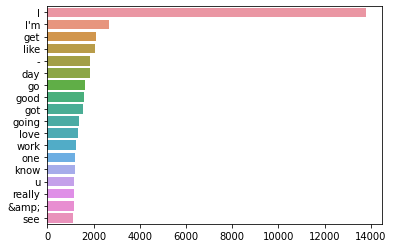

In [ ]:
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:60]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sb.barplot(x=y,y=x)

> Since these are tweets (hence, unfortunatelly, the poor grammar) it will include quite a number stopwords as well. Therefore, next, we will use N-gram analysis - N-grams are simply contiguous sequences of n words. Looking at most frequent n-grams can give a better understanding of the context in which the word was used. To build a representation of the vocabulary Countvectorizer has been used. Countvectorizer is a simple method used to tokenize, vectorize and represent the corpus in an appropriate form. A function that combines everything above has been depicted below -

In [ ]:
def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sb.barplot(x=y,y=x)

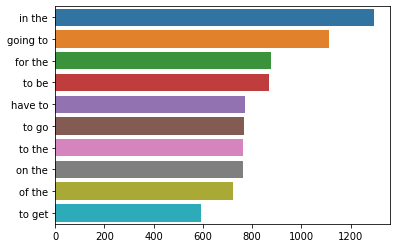

In [ ]:
plot_top_ngrams_barchart(tweetData['tweet'],2)

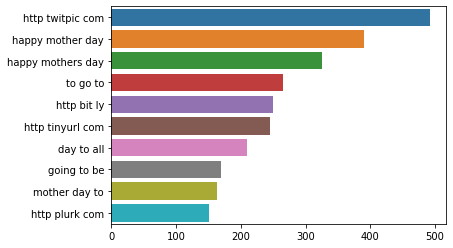

In [ ]:
plot_top_ngrams_barchart(tweetData['tweet'],3)


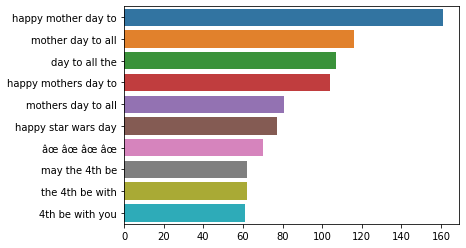

In [ ]:
plot_top_ngrams_barchart(tweetData['tweet'],4)


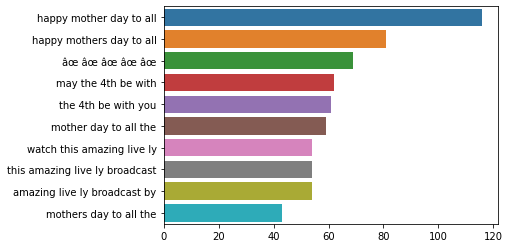

In [ ]:
plot_top_ngrams_barchart(tweetData['tweet'],5)


> The above plots are indicative of the fact that holidays and emojis are the most discussed topics in the dataset.

Topic modeling is the process of using unsupervised learning techniques to extract the main topics that occur in a collection of documents. Latent Dirichlet Allocation (LDA) is an easy to use and efficient model for topic modeling. Each document is represented by the distribution of topics and each topic is represented by the distribution of words. This has been used in practice below to better analyse the dataset.

In [ ]:
# The output of the following cells are interactable - to give a better idea of the dataset
def get_lda_objects(text):
    nltk.download('stopwords')
    nltk.download('punkt')
    nltk.download('wordnet')
    stop=set(stopwords.words('english'))

    
    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    dic=gensim.corpora.Dictionary(corpus)
    bow_corpus = [dic.doc2bow(doc) for doc in corpus]
    
    lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 10, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
    
    return lda_model, bow_corpus, dic

def plot_lda_vis(lda_model, bow_corpus, dic):
    vis = gensimvis.prepare(lda_model, bow_corpus, dic)
    return vis

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
lda_model, bow_corpus, dic = get_lda_objects(tweetData['tweet'])


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

In [ ]:
lda_model.show_topics()


[(0,
  '0.028*"..." + 0.015*"night" + 0.014*"got" + 0.013*"day" + 0.012*"home" + 0.012*"n\'t" + 0.012*"get" + 0.012*"good" + 0.011*"work" + 0.011*"time"'),
 (1,
  '0.049*"quot" + 0.010*"movie" + 0.009*"one" + 0.008*"http" + 0.008*"good" + 0.008*"love" + 0.007*"Thanks" + 0.006*"amazing" + 0.006*"..." + 0.006*"n\'t"'),
 (2,
  '0.017*"..." + 0.013*"lol" + 0.007*"love" + 0.006*"Morning" + 0.004*"amp" + 0.004*"think" + 0.004*"Good" + 0.004*"http" + 0.004*"want" + 0.004*"book"'),
 (3,
  '0.009*"http" + 0.006*"..." + 0.005*"love" + 0.005*"good" + 0.004*"like" + 0.004*"fun" + 0.004*"enjoy" + 0.004*"yay" + 0.004*"luck" + 0.004*"Awesome"'),
 (4,
  '0.030*"n\'t" + 0.012*"know" + 0.009*"love" + 0.008*"..." + 0.008*"\'ll" + 0.007*"see" + 0.005*"thanks" + 0.005*"http" + 0.005*"follower" + 0.005*"twitter"'),
 (5,
  '0.017*"http" + 0.008*"..." + 0.008*"Going" + 0.006*"got" + 0.006*"awesome" + 0.005*"hair" + 0.004*"back" + 0.004*"cool" + 0.004*"today" + 0.004*"like"'),
 (6,
  '0.047*"day" + 0.027*"Happ

In [ ]:
plot_lda_vis(lda_model, bow_corpus, dic)


/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.123967 -0.085907       1        1  21.766818
9      0.040175 -0.127729       2        1  10.567416
8     -0.036484 -0.053962       3        1  10.288879
1      0.012808 -0.033658       4        1   9.283706
6     -0.223571  0.130973       5        1   9.168436
4      0.054037 -0.081354       6        1   8.879419
2      0.034703 -0.050180       7        1   8.335287
7      0.039371  0.041850       8        1   8.144382
5      0.108527  0.153939       9        1   6.902498
3      0.094401  0.106029      10        1   6.663159, topic_info=         Term         Freq        Total Category  logprob  loglift
11722    quot  1863.000000  1863.000000  Default  30.0000  30.0000
222       day  2856.000000  2856.000000  Default  29.0000  29.0000
1540    Happy   885.000000   885.000000  Default  28.0000  28.0000
6756   mother   806.000000   806.000000  Default  27.0000  27.0000
370     happy   781.000000   781.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
726      know    60.232531  1247.800350  Topic10  -5.9649  -0.3223
1050      see    54.697882  1072.873648  Topic10  -6.0613  -0.2677
2633     nice    53.726032   598.849054  Topic10  -6.0792   0.2975
326       new    53.612676   966.604977  Topic10  -6.0814  -0.1834
33        get    53.752095  1852.902692  Topic10  -6.0788  -0.8315

[728 rows x 6 columns], token_table=       Topic      Freq Term
term                       
12985      2  0.967759  'em
109        1  0.277799  'll
109        2  0.171408  'll
109        3  0.110332  'll
109        4  0.068957  'll
...      ...       ...  ...
798        3  0.058902  yes
798        4  0.154618  yes
798        7  0.088353  yes
798        9  0.084672  yes
8721       3  0.958320  yup

[1628 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 10, 9, 2, 7, 5, 3, 8, 6, 4])

The distance between the centers of the circles reflects how similar the themes are.

Wordcloud is a great way to represent text data. The size and color of each word that appears in the wordcloud indicate it’s frequency or importance.

In [ ]:
def plot_wordcloud(text):
    nltk.download('stopwords')
    stop=set(stopwords.words('english'))

    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1)
    
    wordcloud=wordcloud.generate(str(corpus))

    fig = mtplt.figure(1, figsize=(12, 12))
    mtplt.axis('off')
 
    mtplt.imshow(wordcloud)
    mtplt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


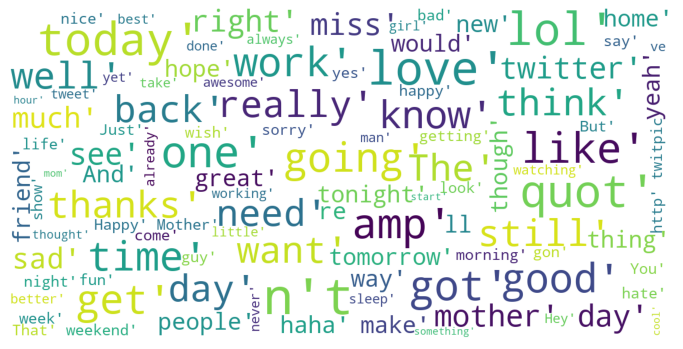

In [ ]:
plot_wordcloud(tweetData['tweet'])


It is important to know the distribution of the target variable so that appropriate feature engineering techniques can be employed to smoothen the distribution, if it is skewed. If the frequency of some values are much higher than the others for the given dataset, there may not be enough training points for the remaining target variable values for the model to make accurate predictions.

neutral       8638
worry         8459
sadness       6025
happiness     5209
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
fear          1257
anger         1051
joy            902
empty          827
enthusiasm     759
boredom        179
Name: tweettype, dtype: int64


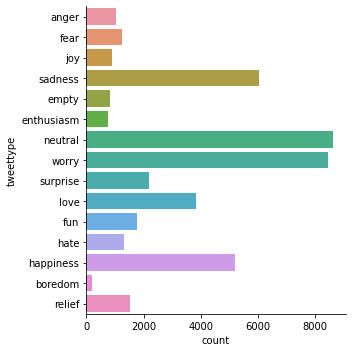

In [ ]:
# Analysing the Target Variable - count plot
print(tweetData["tweettype"].value_counts())
sb.catplot(y = "tweettype", data = tweetData, kind = "count")

The plot above shows the distribution of the target variables in the cleaned dataset. It can be seen, as described earlier, that the dataset appears to be quite skewed, and hence, appropriate feature engineering techniques will have to be deployed to strengthen the predictions of the model.

In [ ]:
tweetData.set_index('tweet_id')


,tweet,tweettype
tweet_id,,
0,@ZubairSabirPTI pls dont insult the word 'Molna',anger
1,@ArcticFantasy I would have almost took offens...,anger
2,@IllinoisLoyalty that Rutgers game was an abom...,anger
3,@CozanGaming that's what lisa asked before she...,anger
4,Sometimes I get mad over something so minuscul...,anger
...,...,...
43955,@JohnLloydTaylor,neutral
43956,Happy Mothers Day All my love,love
43957,Happy Mother's Day to all the mommies out ther...,love


In [ ]:
tweetData.index.name = 'index'


In [ ]:
tweetData = tweetData.set_index('tweet_id')


In [ ]:
# Combining some categories due to lack of data points and improve distribution of target variable
tweetData.loc[tweetData['tweettype'] == 'hate', 'tweettype'] = 'anger'
tweetData.loc[tweetData['tweettype'] == 'happiness', 'tweettype'] = 'joy'
tweetData.loc[tweetData['tweettype'] == 'fun', 'tweettype'] = 'enthusiasm'
tweetData.loc[tweetData['tweettype'] == 'worry', 'tweettype'] = 'sadness'
tweetData.loc[tweetData['tweettype'] == 'empty', 'tweettype'] = 'neutral'

In [ ]:
tweetData['tweettype'].value_counts()


sadness       14484
neutral        9465
joy            6111
love           3842
enthusiasm     2535
anger          2374
surprise       2187
relief         1526
fear           1257
boredom         179
Name: tweettype, dtype: int64

In [ ]:
tweetData.loc[tweetData['tweettype'] == 'boredom', 'tweettype'] = 'neutral'


Continuing from the target variable analysis in Exploratory Data Analysis, it was concluded that there was a necessity to bin a few categories to improve the distribution of the variable values. This is achieved by binning all ‘hate’ categories as ‘anger’, ‘happiness’ as ‘joy’, ‘fun’ as ‘enthusiasm’, ‘worry’ as ‘sadness’ and ‘empty’ as ‘neutral’. Therefore, the total number of categories and hence the outputs is brought down to 9 -

sadness       14484
neutral        9644
joy            6111
love           3842
enthusiasm     2535
anger          2374
surprise       2187
relief         1526
fear           1257
Name: tweettype, dtype: int64


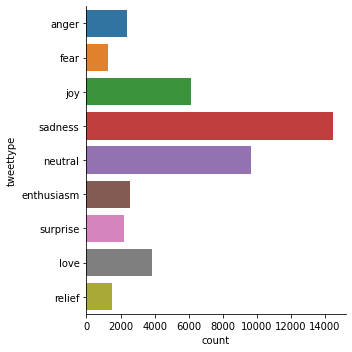

In [ ]:

print(tweetData["tweettype"].value_counts())
sb.catplot(y = "tweettype", data = tweetData, kind = "count")

In [ ]:
tweetData.to_csv('/content/drive/MyDrive/NNDL-Group-project/data/Exploratory-Data-Analysis-Output.csv')